<a href="https://colab.research.google.com/github/OFKadi/Bitirme_Projesi/blob/main/Jupyter_Notebooks/gauss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy.integrate import solve_ivp
from scipy.optimize import curve_fit, root_scalar
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
import math

In [6]:
def vpa_func(r, δ, k, q, pot_func):
  return pot_func(q, r)*(-np.sin(k*r+δ)**2)/k

def fit_func(k, a0, r0):
  return a0 + r0*k**2

def kcotδ_func(k, δ):
  return k / np.tan(δ)

def kcotδ_func(k, δ):
  return k / np.tan(δ)

def cal_as_and_r0(k_arry, phase):
  y_data = kcotδ_func(k_arry, phase)
  popt, pcov = curve_fit(fit_func, k_arry, y_data)

  a_s = -1/popt[0]
  r_0 = 2*popt[1]

  return (a_s, r_0)  

def gaussian_func(a, r):
  return -a[0]*np.exp(-r**2/(2*a[1]**2))
  #return -a[0]

def find_as(a, w):
  k_arry = np.linspace(0.001, 0.1*np.pi, 30)
  eval_point = 5*w

  phase = []
  for k in k_arry:
    sol = solve_ivp(vpa_func, [0, eval_point], [0], max_step=0.5, method='DOP853', t_eval=[eval_point], args=(k, [a, w], gaussian_func))
    # sol = solve_ivp(vpa_func, [0, eval_point], [0], method='DOP853', t_eval=[eval_point], args=(k, [a, w], gaussian_func))
    phase.append(sol.y[0][0])

  phase = np.array(phase)
  a_s, r_0 = cal_as_and_r0(k_arry, phase)
  return a_s

def root_func(a, w, a_s):
  return a_s - find_as(a , w)

In [4]:
w = 10

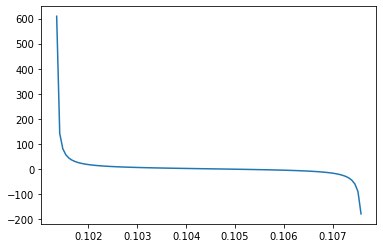

In [13]:
x = np.linspace(0.10135353535353536, 0.10757575757575757, 100)
y = []
for i in x:
  y.append(find_as(i , w))
  # print(i)
plt.plot(x, y)

In [12]:
x[-7]

0.10757575757575757

In [8]:
y

[-32.34936290289556,
 -41.80086228876274,
 -57.792537801909084,
 -92.071120601078,
 -220.28227760836145,
 609.1913069685869,
 129.80240635325035,
 73.16079775489155,
 51.14313586485708,
 39.407905865983714,
 32.09891629029534,
 27.097516289131505,
 23.45124569307097,
 20.641274810127815,
 18.468457977317705,
 16.68199382293495,
 15.198494174040704,
 13.943681334479585,
 12.865945678105138,
 11.927628847301685,
 11.100103664566026,
 10.366507490846837,
 9.706825990853194,
 9.109849378511509,
 8.56574483868235,
 8.066481787258935,
 7.6056401278724906,
 7.17787589355535,
 6.78500802781352,
 6.404566423594035,
 6.052153438451092,
 5.718881883184,
 5.402470691131356,
 5.100890440569776,
 4.811822699117888,
 4.535689852842095,
 4.269191684134533,
 4.011826418248021,
 3.7625101682803392,
 3.5203347387293675,
 3.284286272428498,
 3.053784615297995,
 2.828056769775167,
 2.6063463090157986,
 2.3880673401142283,
 2.1726368663152025,
 1.9594901996054443,
 1.7480925906614273,
 1.537920044473612,
 1

In [17]:
a_s = 0.8072835598853655
f = lambda a_ : a_s - find_as(a_ , w)
sol = root_scalar(f, bracket=[0.10135353535353536, 0.10757575757575757], method='brentq')

In [18]:
sol.root

0.10464054597139953

In [19]:
f(sol.root)

1.4174209250761294e-08

In [ ]:
w = 10
a = 0.1
da = 0.1/w**2
a_s = 0.8072835598853655
f = lambda a_ : a_s - find_as(a_ , w)
s = sign(f(a))
while True:
  a = a + da
  if s * sign(f(a)) < -0.5:
    print(f(a))
    print(f(a-da))
    sol = root_scalar(f, bracket=[a-da, a], method='brentq')
    print(sol.root)
    break

In [ ]:
c = 0.3
w = 10
while True:
  del_a = np.linspace(0.0001, c*np.pi, 100)
  counter = 0
  frst = 0
  for j, i in enumerate(del_a):
    scnd = find_as(i , w)
    if np.sign(frst)*np.sign(scnd) == -1.0 and abs(frst-scnd) > 30:
      counter = counter + 1
      print(frst, scnd, i, del_a[j-1])
      if counter > 4:
        #print("next")
        break
    frst = scnd
  if counter < 4:
    c = c + c*0.15
    print("up", c)
  elif counter == 4:
    print(c)
    break
  else:
    c = c - c*0.3
    print("down", c)
   


In [ ]:
f = lambda a_ : a_s - find_as(a_ , w)
sol = root_scalar(f, bracket=[0.10135353535353536, 0.10757575757575757], method='brentq')
print(sol.root)

-1847.0167014282918 1727.879152785396
0.0039999999999999975
-271.0617784617046 19.726260813168523
0.024899999999999905


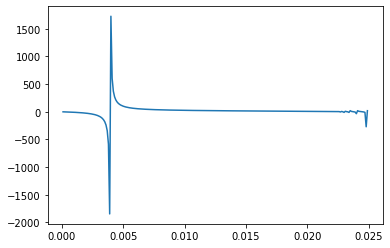

In [213]:
w = 10
da = 0.1/np.exp(2*w**2)
a_ = da
a_s = 0.8072835598853655
g_point = 0
points = [0, 0]
frst = find_as(a_*np.pi , w)
x = [a_]
y = [frst]
while True:
  a_ = a_ + da
  scnd = find_as(a_*np.pi , w)
  x.append(a_)
  y.append(scnd)
  if np.sign(frst)*np.sign(scnd) == -1.0 and abs(frst-scnd) > 100 :
    if g_point == 0:
      points[g_point] = a_
      g_point = g_point + 1
    else:
      points[g_point] = a_ - da
      g_point = g_point + 1
    print(frst, scnd)
    print(a_)
    if g_point == 2:
      break
  frst = scnd

plt.plot(x, y)